In [22]:
from sklearn import datasets
boston = datasets.load_boston()

In [23]:
X = boston.data
y = boston.target

In [24]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))    

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [25]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.468098837801122, 34.135235282917357)

In [26]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.468098837801122, -34.135235282917357)

In [27]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sungchulchoi/miniconda3/envs/ml_scratch/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_r2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([ 0.0009222 ,  0.00077486,  0.00058413,  0.00057507,  0.00057006,
         0.00055194,  0.00062013,  0.0005331 ,  0.00056124,  0.00065303]),
 'score_time': array([ 0.00046277,  0.00040913,  0.00037885,  0.00039506,  0.00039101,
         0.00038695,  0.00039387,  0.00046492,  0.00041485,  0.0004158 ]),
 'test_neg_mean_squared_error': array([ -11.76550876,  -17.88254102,  -10.52975553,  -60.79007952,
         -46.7759819 ,  -40.76705647,  -17.313559  , -102.67749124,
         -22.86943714,  -13.30957779]),
 'test_r2': array([ 0.66270514,  0.33413794, -0.50110792,  0.38037366,  0.33641058,
         0.45825049, -0.082118  ,  0.3113827 , -0.21342225,  0.29440448]),
 'train_neg_mean_squared_error': array([-28.25867446, -28.09877093, -28.29544619, -25.60605534,
        -26.94590404, -27.99625629, -28.41840338, -16.87943445,
        -26.20686855, -27.77076728]),
 'train_r2': array([ 0.68408428,  0.68943221,  0.68778806,  0.65139783,  0.67380667,
         0.62984201,  0.69064

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.682611200049642, -24.07786979093618)

In [29]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [30]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.411385916387569, -23.867078861847222)

In [31]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

In [32]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [33]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [58]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)    

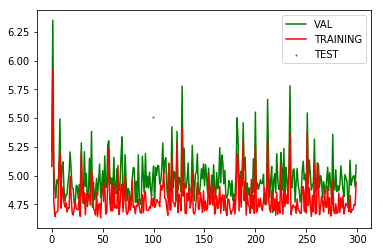

In [59]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [60]:
np.argsort(rmse_val_score)

array([217,  70,  40, 291, 101,  35,  87, 229, 156, 209, 275,  31,  22,
        23,  84, 195,  82, 239, 244,  77,  51, 197,  13,  74, 140, 122,
       178,  42, 161,  26,  86,  38,   4, 266,  88, 172, 232, 214, 114,
        48, 287,  78, 176, 135,  98, 180,  71, 171,   9,  45, 210, 193,
        14,  30,  15, 245, 191, 145, 179, 196,  63, 173, 269, 116,  36,
       153, 199, 220,  91, 250,  43,  28, 280, 127, 259,  76, 144, 211,
       292, 282,  66, 272, 227, 243, 278, 255, 136, 124, 286, 203, 224,
       201,  62, 223, 113, 155,  60, 260, 163,  12,  75, 277, 160, 132,
        21, 137,  20,  95, 194, 119, 236, 158,  97, 263, 268,  53,  93,
        54, 184, 298, 235,  25,  33,   3, 187, 150, 281, 117, 256,  24,
        49, 131, 294, 242,  67, 283, 274,  27, 204, 106, 146,  58, 169,
       206, 175, 252, 192, 202, 207,   6, 166, 164, 257, 240, 129,  41,
        16, 267, 107, 126, 290,  83,  73, 174,  46, 265, 270, 295, 177,
       215, 218,   5, 222, 205,  79, 248, 148, 133, 231,  90,  4

In [62]:
rmse(y_test,sgd_regressor.predict(X_test))

5.5049756549337987

In [61]:
rmse(y_test,model_list[217].predict(X_test))

4.8835581103211512

In [38]:
model_list[0].coef_

array([-0.12134601,  0.10508264, -0.09571984,  0.01254946,  0.00636562,
        0.2211412 ,  0.11739601,  0.02331805,  0.00339349,  0.00585604,
        0.11639323,  0.04293966, -0.53679066])